In [1]:
import xarray as xr
import numpy as np
from xgcm.grid import Grid
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from glob import glob
from matplotlib.colors import LogNorm
import matplotlib.patches as patches

In [2]:
ds1 = xr.open_zarr('/swot/SUM02/spencer/daily_filt/two_weeks.zarr')

In [3]:
ds=ds1.isel(time=slice(43,-43))

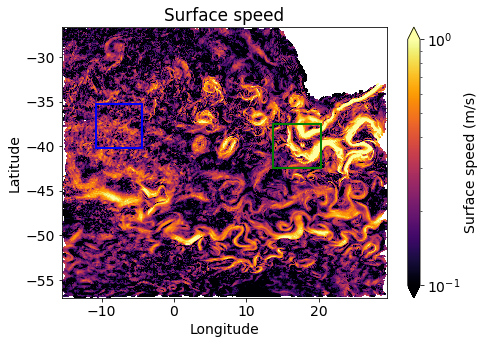

In [4]:
plt.figure(figsize=(7,5))
from matplotlib.colors import LogNorm
(np.sqrt(ds.unfiltered_u**2+ds.unfiltered_v**2)).where(np.sqrt(ds.lagfiltered_u**2+ds.lagfiltered_v**2)>0).isel(time=1).rename('Surface speed (m/s)').plot.pcolormesh(
        x='x0',y='y0',norm=LogNorm(),vmin=10**-1,vmax=1,rasterized=True,cbar_kwargs={'extend':'both'}, cmap='inferno')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('')

ax=plt.gca()
#rect = patches.Rectangle((3.538, -45.945), 6.945, 4.897, linewidth=2, edgecolor='b', facecolor='none')
rect = patches.Rectangle((-10.76, -40.22), 6.33, 4.897, linewidth=2, edgecolor='b', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

rect = patches.Rectangle((13.728, -42.427), 6.544, 4.895, linewidth=2, edgecolor='g', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.title('Surface speed')

plt.tight_layout()
fig = plt.gcf()
fig.savefig("unfiltered.png")